# Convolutional Neural Network

### Importing the libraries

In [26]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [28]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
import sys
from PIL import Image
import matplotlib.pyplot as plt

In [29]:
tf.__version__

'2.3.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [30]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:/Users/sam/Desktop/Master degree of CS chula links/kaggle/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 3000 images belonging to 2 classes.


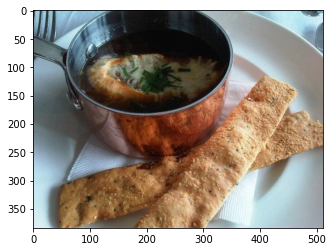

In [31]:
img = load_img("C:/Users/sam/Desktop/Master degree of CS chula links/kaggle/training/food/0.jpg")
plt.imshow(img)
plt.show()

### Preprocessing the Test set

In [32]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/sam/Desktop/Master degree of CS chula links/kaggle/testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [33]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [35]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [36]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [37]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [38]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [39]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [40]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [41]:
model = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
94/94 [==============================] - 16s 171ms/step - loss: 0.4753 - accuracy: 0.7790 - val_loss: 0.5351 - val_accuracy: 0.7590
Epoch 2/25
94/94 [==============================] - 14s 154ms/step - loss: 0.4094 - accuracy: 0.8227 - val_loss: 0.3706 - val_accuracy: 0.8370
Epoch 3/25
94/94 [==============================] - 15s 155ms/step - loss: 0.3458 - accuracy: 0.8533 - val_loss: 0.3524 - val_accuracy: 0.8540
Epoch 4/25
94/94 [==============================] - 15s 155ms/step - loss: 0.3097 - accuracy: 0.8707 - val_loss: 0.4023 - val_accuracy: 0.8420
Epoch 5/25
94/94 [==============================] - 15s 155ms/step - loss: 0.2954 - accuracy: 0.8783 - val_loss: 0.3777 - val_accuracy: 0.8460
Epoch 6/25
94/94 [==============================] - 15s 156ms/step - loss: 0.2768 - accuracy: 0.8877 - val_loss: 0.3141 - val_accuracy: 0.8720
Epoch 7/25
94/94 [==============================] - 15s 155ms/step - loss: 0.2622 - accuracy: 0.8920 - val_loss: 0.4533 - val_accuracy: 0.8180

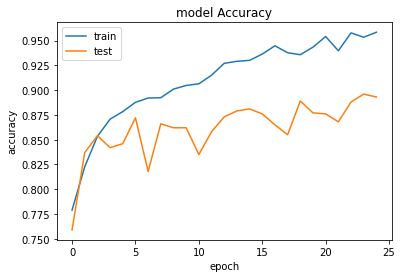

In [42]:
# Accuracy plot

plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

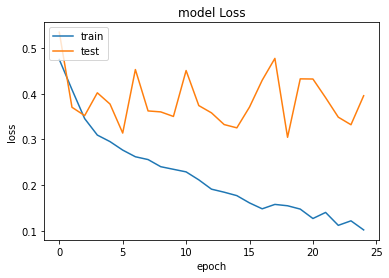

In [43]:
# Loss plot

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Part 4 - Making a single prediction

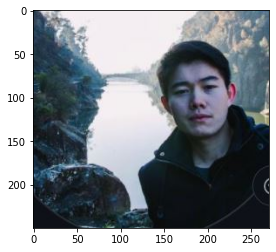

In [49]:
img1 = load_img("C:/Users/sam/Desktop/Master degree of CS chula links/kaggle/prediction/myself.jpg")
plt.imshow(img1)
plt.show()

In [64]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:/Users/sam/Desktop/Master degree of CS chula links/kaggle/prediction/myself.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction1 = 'non_food'
else:
  prediction1 = 'food'

In [65]:
print(prediction1)

non_food


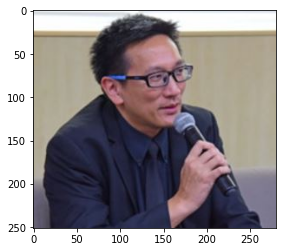

In [51]:
img2 = load_img("C:/Users/sam/Desktop/Master degree of CS chula links/kaggle/prediction/Ajsukree.jpg")
plt.imshow(img2)
plt.show()

In [66]:
test_image2 = image.load_img('C:/Users/sam/Desktop/Master degree of CS chula links/kaggle/prediction/Ajsukree.jpg', target_size = (64, 64))
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis = 0)
result2 = cnn.predict(test_image2)
training_set.class_indices
if result2[0][0] == 1:
  prediction2 = 'non_food'
else:
  prediction2 = 'food'

In [67]:
print(prediction2)

non_food


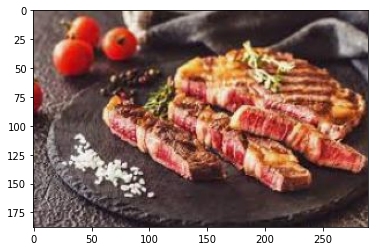

In [75]:
img3 = load_img("C:/Users/sam/Desktop/Master degree of CS chula links/kaggle/prediction/steak.jpg")
plt.imshow(img3)
plt.show()

In [78]:
test_image3 = image.load_img('C:/Users/sam/Desktop/Master degree of CS chula links/kaggle/prediction/steak.jpg', target_size = (64, 64))
test_image3 = image.img_to_array(test_image3)
test_image3 = np.expand_dims(test_image3, axis = 0)
result3 = cnn.predict(test_image3)
training_set.class_indices
if result3[0][0] == 1:
  prediction3 = 'non_food'
else:
  prediction3 = 'food'

In [79]:
print(prediction3)

food


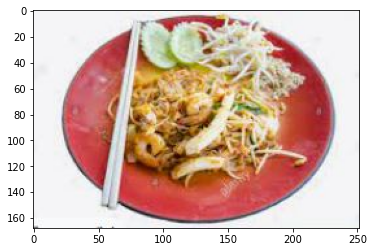

In [82]:
img4 = load_img("C:/Users/sam/Desktop/Master degree of CS chula links/kaggle/prediction/pudthai.jpg")
plt.imshow(img4)
plt.show()

In [80]:
test_image4 = image.load_img('C:/Users/sam/Desktop/Master degree of CS chula links/kaggle/prediction/pudthai.jpg', target_size = (64, 64))
test_image4 = image.img_to_array(test_image4)
test_image4 = np.expand_dims(test_image4, axis = 0)
result4 = cnn.predict(test_image3)
training_set.class_indices
if result4[0][0] == 1:
  prediction4 = 'non_food'
else:
  prediction4 = 'food'

In [81]:
print(prediction4)

food


In [84]:
pip install --upgrade jupyterhub

  Created wheel for python-json-logger: filename=python_json_logger-2.0.1-py34-none-any.whl size=7378 sha256=5099f84a6b4254f253eb7abec761d30b41e1874aab14ca6dfe86f433f59ca74b
  Stored in directory: c:\users\sam\appdata\local\pip\cache\wheels\17\25\e2\bc6585122b6e1b5b2bce42a9756143e0d85c317874abb5623e
Successfully built python-json-logger
Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install --upgrade --user nbconvert

Requirement already up-to-date: nbconvert in c:\users\sam\anaconda3\envs\sam\lib\site-packages (6.0.7)
Note: you may need to restart the kernel to use updated packages.
